# 版本控制的乐趣和好处：从个人工作流到开放式协作离不开的工具

## 什么是版本控制

“版本控制”，也称为版本控制，源代码控制
或软件配置管理（SCM），是
**存储和管理文档，程序和其他方面的更改信息。** 

**重现

跟踪并重现工作的每一步  
在软件世界中：它被称为*版本控制*！

（优秀的）版本控制工具给你带来了什么？

**安心**（备份）  
**自由**（探索性分支）  
**协作**（同步）

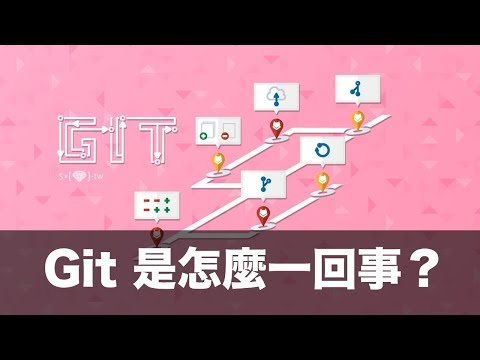

In [2]:
from IPython.display import YouTubeVideo
YouTubeVideo('LgTf7m5B0xA')

## Git是一种技术：对所有内容使用版本控制

* 论文写作（再也不会收到`paper_v5_john_jane_final_oct22_really_final.tex`的邮件了！）。
* 申请书写作
* 日常研究
* 教学（再也不接受电子邮件作业了！using github）

## 本教程的计划

本教程的结构如下：我们将首先简要概述需要理解的关键概念，了解GIT的意义。然后我们将深入研究实际操作：在进行必要配置的简短介绍之后，我们将讨论5个“git阶段”，其中包括日益复杂和复杂的场景，为每个阶段引入必要的命令：
            
1. 本地，单用户，线性工作流程
2. 单个本地用户，分支
3. 远程单用户
4. 在小团队中进行远程协作
5. 使用github的分布式协作
    
实际上，本教程仅涵盖1-4阶段，因为对于＃5，有许多面向软件开发的教程和在线高质量的文档。但是大多数科学家开始的时候仅使用一些文件或一个小团队工作，因此我认为首先建立基于日常生活中遇到的问题以及没有“行话”的关键概念和实践是很重要的。

一旦你熟悉1-4，关于在开源项目上使用github进行协作的优秀教程应该是有意义的。

## Very high level picture: an overview of key concepts

## 关键概念的概述

The **commit**: *a snapshot of work at a point in time*

<!-- offline: 
![](fig/commit_anatomy.png)
-->

<img src="https://raw.github.com/fperez/reprosw/master/fig/commit_anatomy.png">

Credit: ProGit book, by Scott Chacon, CC License.

**提交**：*在某个时间点工作的快照*

<!-- offline: 
![](fig/commit_anatomy.png)
-->

<img src="https://raw.github.com/fperez/reprosw/master/fig/commit_anatomy.png">

图片来自于Scott Chacon撰写的Pro Git书籍，CC许可。

In [1]:
ls

'Git Version Control.ipynb'   Untitled3.ipynb   Untitled7.ipynb   test/
 Untitled.ipynb               Untitled4.ipynb   Untitled8.ipynb
 Untitled1.ipynb              Untitled5.ipynb   course/
 Untitled2.ipynb              Untitled6.ipynb   notebook.tex


A **repository**: a group of *linked* commits

<!-- offline: 
![](files/fig/threecommits.png)
-->

<img src="https://raw.github.com/fperez/reprosw/master/fig/threecommits.png" >

Note: these form a Directed Acyclic Graph (DAG), with nodes identified by their *hash*.

A **hash**: a fingerprint of the content of each commit *and its parent*

In [7]:
import hashlib 

# Our first commit
data1 = 'This is the start of my paper.'
meta1 = 'date: 1/1/18'
hash1 = hashlib.sha1()
hash1.update((meta1 + data1).encode('utf-8'))
print(hash1.hexdigest())


230bda9c0d54909da74aa8c8811f4c57fa9cb5eb


In [9]:
# Our second commit
data2 = 'This is the start of my paper2.'
meta2 = 'date: 1/1/18'
hash2 = hashlib.sha1()
hash2.update((meta2 + data2 + str(hash1)).encode('utf-8'))
print(hash2.hexdigest())

b9af477ad4277142407cb4b222eeb18ee077457c


**这几乎是Git的精髓！**

## 首先配置git

你至少要告诉git你是谁

In [17]:
%%bash
git config --global user.name "alone"
git config --global user.email "alone@swufe.edu.cn"

有一些其他配置，比如用什么编辑器

In [9]:
%%bash
# Put here your preferred editor. If this is not set, git will honor
# the $EDITOR environment variable
git config --global core.editor /usr/bin/jed  # my lightweight unix editor

# On Windows Notepad will do in a pinch, I recommend Notepad++ as a free alternative
# On the mac, you can set nano or emacs as a basic option

# And while we're at it, we also turn on the use of color, which is very useful
git config --global color.ui "auto"

Set git to use the credential memory cache so we don't have to retype passwords too frequently. On Linux, you should run the following (note that this requires git version 1.7.10 or newer):

In [10]:
%%bash 
git config --global credential.helper cache
# Set the cache to timeout after 2 hours (setting is in seconds)
git config --global credential.helper 'cache --timeout=7200'

Github offers in its help pages instructions on how to configure the credentials helper for [Mac OSX](https://help.github.com/articles/set-up-git#platform-mac) and [Windows](https://help.github.com/articles/set-up-git#platform-windows).

## Stage 1: Local, single-user, linear workflow

Simply type `git` to see a full list of all the 'core' commands.  We'll now go through most of these via small practical exercises:

In [11]:
!git

usage: git [--version] [--help] [-C <path>] [-c <name>=<value>]
           [--exec-path[=<path>]] [--html-path] [--man-path] [--info-path]
           [-p | --paginate | --no-pager] [--no-replace-objects] [--bare]
           [--git-dir=<path>] [--work-tree=<path>] [--namespace=<name>]
           <command> [<args>]

These are common Git commands used in various situations:

start a working area (see also: git help tutorial)
   clone      Clone a repository into a new directory
   init       Create an empty Git repository or reinitialize an existing one

work on the current change (see also: git help everyday)
   add        Add file contents to the index
   mv         Move or rename a file, a directory, or a symlink
   reset      Reset current HEAD to the specified state
   rm         Remove files from the working tree and from the index

examine the history and state (see also: git help revisions)
   bisect     Use binary search to find the commit that introduced a bug
   grep       Prin

### `git init`: create an empty repository

In [12]:
%%bash
rm -rf test
git init test

Initialized empty Git repository in /home/jupyter-alone/test/.git/


**Note:** all these cells below are meant to be run by you in a terminal  where  you change *once* to the `test` directory and continue working there.

Since we are putting all of them here in a single notebook for the purposes of the tutorial, they will all be prepended with the first two lines:

    %%bash
    cd test

that tell IPython to do that each time.  But you should ignore those two lines and type the rest of each cell yourself in your terminal.

Let's look at what git did:

In [13]:
%%bash
cd test

ls

In [14]:
%%bash
cd test

ls -la

total 12
drwxr-xr-x  3 jupyter-alone jupyter-alone 4096 Sep 16 12:46 .
drwxr-x--- 11 jupyter-alone jupyter-alone 4096 Sep 16 12:46 ..
drwxr-xr-x  7 jupyter-alone jupyter-alone 4096 Sep 16 12:46 .git


In [15]:
%%bash
cd test

ls -l .git

total 32
-rw-r--r-- 1 jupyter-alone jupyter-alone   23 Sep 16 12:46 HEAD
drwxr-xr-x 2 jupyter-alone jupyter-alone 4096 Sep 16 12:46 branches
-rw-r--r-- 1 jupyter-alone jupyter-alone   92 Sep 16 12:46 config
-rw-r--r-- 1 jupyter-alone jupyter-alone   73 Sep 16 12:46 description
drwxr-xr-x 2 jupyter-alone jupyter-alone 4096 Sep 16 12:46 hooks
drwxr-xr-x 2 jupyter-alone jupyter-alone 4096 Sep 16 12:46 info
drwxr-xr-x 4 jupyter-alone jupyter-alone 4096 Sep 16 12:46 objects
drwxr-xr-x 4 jupyter-alone jupyter-alone 4096 Sep 16 12:46 refs


Now let's edit our first file in the test directory with a text editor... I'm doing it programatically here for automation purposes, but you'd normally be editing by hand

In [16]:
%%bash
cd test

echo "My first bit of text" > file1.txt

### `git add`: tell git about this new file

In [17]:
%%bash
cd test

git add file1.txt

We can now ask git about what happened with `status`:

In [18]:
%%bash
cd test

git status

On branch master

No commits yet

Changes to be committed:
  (use "git rm --cached <file>..." to unstage)

	new file:   file1.txt



### `git commit`: permanently record our changes in git's database

For now, we are *always* going to call `git commit` either with the `-a` option *or* with specific filenames (`git commit file1 file2...`).  This delays the discussion of an aspect of git called the *index* (often referred to also as the 'staging area') that we will cover later.  Most everyday work in regular scientific practice doesn't require understanding the extra moving parts that the index involves, so on a first round we'll bypass it.  Later on we will discuss how to use it to achieve more fine-grained control of what and how git records our actions.

In [19]:
%%bash
cd test

git commit -a -m"This is our first commit"

[master (root-commit) 0e0bac8] This is our first commit
 1 file changed, 1 insertion(+)
 create mode 100644 file1.txt


In the commit above, we  used the `-m` flag to specify a message at the command line.  If we don't do that, git will open the editor we specified in our configuration above and require that we enter a message.  By default, git refuses to record changes that don't have a message to go along with them (though you can obviously 'cheat' by using an empty or meaningless string: git only tries to facilitate best practices, it's not your nanny).

### `git log`: what has been committed so far

In [46]:
%%bash
cd test

git log

commit 679f2466f0d0ad80a8f1fa59b5a0ae67569fb1ab
Author: Fernando Perez <Fernando.Perez@berkeley.edu>
Date:   Thu Feb 14 00:57:11 2013 -0800

    This is our first commit


### `git diff`: what have I changed?

Let's do a little bit more work... Again, in practice you'll be editing the files by hand, here we do it via shell commands for the sake of automation (and therefore the reproducibility of this tutorial!)

In [47]:
%%bash
cd test

echo "And now some more text..." >> file1.txt

And now we can ask git what is different:

In [48]:
%%bash
cd test

git diff

diff --git a/file1.txt b/file1.txt
index ce645c7..4baa979 100644
--- a/file1.txt
+++ b/file1.txt
@@ -1 +1,2 @@
 My first bit of text
+And now some more text...


### The cycle of git virtue: work, commit, work, commit, ...

In [49]:
%%bash
cd test

git commit -a -m"I have made great progress on this critical matter."

[master 2d29a7b] I have made great progress on this critical matter!
 1 file changed, 1 insertion(+)


### `git log` revisited

First, let's see what the log shows us now:

In [50]:
%%bash
cd test

git log

commit 2d29a7b199ccb3462fdf090ca24aee7d051d0185
Author: Fernando Perez <Fernando.Perez@berkeley.edu>
Date:   Thu Feb 14 00:57:18 2013 -0800

    I have made great progress on this critical matter!

commit 679f2466f0d0ad80a8f1fa59b5a0ae67569fb1ab
Author: Fernando Perez <Fernando.Perez@berkeley.edu>
Date:   Thu Feb 14 00:57:11 2013 -0800

    This is our first commit


Sometimes it's handy to see a very summarized version of the log:

In [51]:
%%bash
cd test

git log --oneline --topo-order --graph

* 2d29a7b I have made great progress on this critical matter!
* 679f246 This is our first commit


Git supports *aliases:* new names given to command combinations. Let's make this handy shortlog an alias, so we only have to type `git slog` and see this compact log:

In [19]:
%%bash
cd test

# We create our alias (this saves it in git's permanent configuration file):
git config --global alias.slog "log --oneline --topo-order --graph"

# And now we can use it
git slog

* d14a7d2 I have made great progress on this critical matter!
* dc31b2a This is our first commit


### `git mv` and `rm`: moving and removing files

While `git add` is used to add fils to the list git tracks, we must also tell it if we want their  names to change or for it to stop tracking them.  In familiar Unix fashion, the `mv` and `rm` git commands do precisely this:

In [1]:
%%bash
cd test

git mv file1.txt file-newname.txt
git status

On branch master
Changes to be committed:
  (use "git reset HEAD <file>..." to unstage)

	renamed:    file1.txt -> file-newname.txt



Note that these changes must be committed too, to become permanent!  In git's world, until something hasn't been committed, it isn't permanently recorded anywhere.

In [3]:
%%bash
cd test

git commit -a -m"I like this new name better"
echo "Let's look at the log again:"
git log

On branch master
nothing to commit, working tree clean
Let's look at the log again:
commit 3558c56991010e04d98fba80ee419eacdced3d1e
Author: Fernando Perez <Fernando.Perez@berkeley.edu>
Date:   Sun Sep 16 13:44:53 2018 +0000

    I like this new name better

commit 0e0bac8aaae1322139706d9c2542994267d620aa
Author: Fernando Perez <Fernando.Perez@berkeley.edu>
Date:   Sun Sep 16 12:47:06 2018 +0000

    This is our first commit


And `git rm` works in a similar fashion.

### Exercise

Add a new file `file2.txt`, commit it, make some changes to it, commit them again, and then remove it (and don't forget to commit this last step!).

## Local user, branching

What is a branch?  Simply a *label for the 'current' commit in a sequence of ongoing commits*:

<!-- offline: 
![](files/fig/masterbranch.png)
-->

<img src="https://raw.github.com/fperez/reprosw/master/fig/masterbranch.png" >

There can be multiple branches alive at any point in time; the working directory is the state of a special pointer called HEAD.  In this example there are two branches, *master* and *testing*, and *testing* is the currently active branch since it's what HEAD points to:

<!-- offline: 
![](files/fig/HEAD_testing.png)
-->

<img src="https://raw.github.com/fperez/reprosw/master/fig/HEAD_testing.png" >

Once new commits are made on a branch, HEAD and the branch label move with the new commits:

<!-- offline: 
![](files/fig/branchcommit.png)
-->

<img src="https://raw.github.com/fperez/reprosw/master/fig/branchcommit.png" >

This allows the history of both branches to diverge:

<!-- offline: 
![](files/fig/mergescenario.png)
-->

<img src="https://raw.github.com/fperez/reprosw/master/fig/mergescenario.png" >

But based on this graph structure, git can compute the necessary information to merge the divergent branches back and continue with a unified line of development:
    
<!-- offline: 
![](files/fig/mergeaftermath.png)
-->

<img src="https://raw.github.com/fperez/reprosw/master/fig/mergeaftermath.png" >

Let's now illustrate all of this with a concrete example.  Let's get our bearings first:

In [4]:
%%bash
cd test

git status
ls

On branch master
nothing to commit, working tree clean
file-newname.txt


We are now going to try two different routes of development: on the `master` branch we will add one file and on the `experiment` branch, which we will create, we will add a different one.  We will then merge the experimental branch into `master`.

In [5]:
%%bash
cd test

git branch experiment
git checkout experiment

Switched to branch 'experiment'


In [7]:
%%bash
cd test

echo "Some crazy idea" > experiment.txt
git add experiment.txt
git commit -a -m"Trying something new"
git log

On branch experiment
nothing to commit, working tree clean
commit 815af8df2f39c6a302479095c205503aed1fe361
Author: Fernando Perez <Fernando.Perez@berkeley.edu>
Date:   Sun Sep 16 13:46:48 2018 +0000

    Trying something new

commit 3558c56991010e04d98fba80ee419eacdced3d1e
Author: Fernando Perez <Fernando.Perez@berkeley.edu>
Date:   Sun Sep 16 13:44:53 2018 +0000

    I like this new name better

commit 0e0bac8aaae1322139706d9c2542994267d620aa
Author: Fernando Perez <Fernando.Perez@berkeley.edu>
Date:   Sun Sep 16 12:47:06 2018 +0000

    This is our first commit


In [8]:
%%bash
cd test

git checkout master
git log

commit 3558c56991010e04d98fba80ee419eacdced3d1e
Author: Fernando Perez <Fernando.Perez@berkeley.edu>
Date:   Sun Sep 16 13:44:53 2018 +0000

    I like this new name better

commit 0e0bac8aaae1322139706d9c2542994267d620aa
Author: Fernando Perez <Fernando.Perez@berkeley.edu>
Date:   Sun Sep 16 12:47:06 2018 +0000

    This is our first commit


Switched to branch 'master'


In [10]:
%%bash
cd test

echo "All the while, more work goes on in master..." >> file-newname.txt
git commit -a -m"The mainline keeps moving"
git log

[master 24a0498] The mainline keeps moving
 1 file changed, 1 insertion(+)
commit 24a049857bbe0c0a163cad740ea131fa64fb7308
Author: Fernando Perez <Fernando.Perez@berkeley.edu>
Date:   Sun Sep 16 13:47:07 2018 +0000

    The mainline keeps moving

commit 1b51e46080df5f0a50cc101a450659b7387a6b89
Author: Fernando Perez <Fernando.Perez@berkeley.edu>
Date:   Sun Sep 16 13:47:04 2018 +0000

    The mainline keeps moving

commit 3558c56991010e04d98fba80ee419eacdced3d1e
Author: Fernando Perez <Fernando.Perez@berkeley.edu>
Date:   Sun Sep 16 13:44:53 2018 +0000

    I like this new name better

commit 0e0bac8aaae1322139706d9c2542994267d620aa
Author: Fernando Perez <Fernando.Perez@berkeley.edu>
Date:   Sun Sep 16 12:47:06 2018 +0000

    This is our first commit


In [11]:
%%bash
cd test

ls

file-newname.txt


In [13]:
%%bash
cd test

git merge experiment
git log

Already up to date.
commit afe1f981104033b67d9cb4d2301141b4b5b3dbe8
Merge: 24a0498 815af8d
Author: Fernando Perez <Fernando.Perez@berkeley.edu>
Date:   Sun Sep 16 13:47:12 2018 +0000

    Merge branch 'experiment'

commit 24a049857bbe0c0a163cad740ea131fa64fb7308
Author: Fernando Perez <Fernando.Perez@berkeley.edu>
Date:   Sun Sep 16 13:47:07 2018 +0000

    The mainline keeps moving

commit 1b51e46080df5f0a50cc101a450659b7387a6b89
Author: Fernando Perez <Fernando.Perez@berkeley.edu>
Date:   Sun Sep 16 13:47:04 2018 +0000

    The mainline keeps moving

commit 815af8df2f39c6a302479095c205503aed1fe361
Author: Fernando Perez <Fernando.Perez@berkeley.edu>
Date:   Sun Sep 16 13:46:48 2018 +0000

    Trying something new

commit 3558c56991010e04d98fba80ee419eacdced3d1e
Author: Fernando Perez <Fernando.Perez@berkeley.edu>
Date:   Sun Sep 16 13:44:53 2018 +0000

    I like this new name better

commit 0e0bac8aaae1322139706d9c2542994267d620aa
Author: Fernando Perez <Fernando.Perez@berkeley.edu>

## Using remotes as a single user

We are now going to introduce the concept of a *remote repository*: a pointer to another copy of the repository that lives on a different location.  This can be simply a different path on the filesystem or a server on the internet.

For this discussion, we'll be using remotes hosted on the [GitHub.com](http://github.com) service, but you can equally use other services like [BitBucket](http://bitbucket.org) or [Gitorious](http://gitorious.org) as well as host your own.

In [14]:
%%bash
cd test

ls
echo "Let's see if we have any remote repositories here:"
git remote -v

experiment.txt
file-newname.txt
Let's see if we have any remote repositories here:


Since the above cell didn't produce any output after the `git remote -v` call, it means we have no remote repositories configured.  We will now proceed to do so.  Once logged into GitHub, go to the [new repository page](https://github.com/new) and make a repository called `test`.  Do **not** check the box that says `Initialize this repository with a README`, since we already have an existing repository here.  That option is useful when you're starting first at Github and don't have a repo made already on a local computer.

We can now follow the instructions from the next page:

In [ ]:
%%bash
cd test
git config --global user.name "alonegg"
git config --global user.email "alonegg@gmai.com"

git remote add origin https://github.com/alonegg/test.git
git push -u origin master

Let's see the remote situation again:

In [ ]:
%%bash
cd test

git remote -v

We can now [see this repository publicly on github](https://github.com/fperez/test).

Let's see how this can be useful for backup and syncing work between two different computers.  I'll simulate a 2nd computer by working in a different directory...

In [3]:
%%bash

# Here I clone my 'test' repo but with a different name, test2, to simulate a 2nd computer
git clone https://github.com/SWUFE-FINTECH/workshop.git test2
cd test2
pwd
git remote -v

/home/jupyter-alone/test2
origin	https://github.com/SWUFE-FINTECH/workshop.git (fetch)
origin	https://github.com/SWUFE-FINTECH/workshop.git (push)


Cloning into 'test2'...


Let's now make some changes in one 'computer' and synchronize them on the second.

In [69]:
%%bash
cd test2  # working on computer #2

echo "More new content on my experiment" >> experiment.txt
git commit -a -m"More work, on machine #2"

[master f4c4f5b] More work, on machine #2
 1 file changed, 1 insertion(+)


Now we put this new work up on the github server so it's available from the internet

In [70]:
%%bash
cd test2

git push

To https://github.com/fperez/test.git
   c5831b5..f4c4f5b  master -> master


Now let's fetch that work from machine #1:

In [71]:
%%bash
cd test

git pull

Updating c5831b5..f4c4f5b
Fast-forward
 experiment.txt |    1 +
 1 file changed, 1 insertion(+)


From https://github.com/fperez/test
   c5831b5..f4c4f5b  master     -> origin/master


### An important aside: conflict management

While git is very good at merging, if two different branches modify the same file in the same location, it simply can't decide which change should prevail.  At that point, human intervention is necessary to make the decision.  Git will help you by marking the location in the file that has a problem, but it's up to you to resolve the conflict.  Let's see how that works by intentionally creating a conflict.

We start by creating a branch and making a change to our experiment file:

In [72]:
%%bash
cd test

git branch trouble
git checkout trouble
echo "This is going to be a problem..." >> experiment.txt
git commit -a -m"Changes in the trouble branch"

[trouble 662e76a] Changes in the trouble branch
 1 file changed, 1 insertion(+)


Switched to branch 'trouble'


And now we go back to the master branch, where we change the *same* file:

In [73]:
%%bash
cd test

git checkout master
echo "More work on the master branch..." >> experiment.txt
git commit -a -m"Mainline work"

[master 865aba4] Mainline work
 1 file changed, 1 insertion(+)


Switched to branch 'master'


So now let's see what happens if we try to merge the `trouble` branch into `master`:

In [74]:
%%bash
cd test

git merge trouble

Auto-merging experiment.txt
CONFLICT (content): Merge conflict in experiment.txt
Automatic merge failed; fix conflicts and then commit the result.


Let's see what git has put into our file:

In [75]:
%%bash
cd test

cat experiment.txt

Some crazy idea
More new content on my experiment
<<<<<<< HEAD
More work on the master branch...
This is going to be a problem...
>>>>>>> trouble


At this point, we go into the file with a text editor, decide which changes to keep, and make a new commit that records our decision.  I've now made the edits, in this case I decided that both pieces of text were useful, but integrated them with some changes:

In [76]:
%%bash
cd test

cat experiment.txt

Some crazy idea
More new content on my experiment
More work on the master branch...
This is going to be a problem...


Let's then make our new commit:

In [ ]:
%%bash
cd test

git commit -a -m"Completed merge of trouble, fixing conflicts along the way"
git log

*Note:* While it's a good idea to understand the basics of fixing merge conflicts by hand, in some cases you may find the use of an automated tool useful.  Git supports multiple [merge tools](https://www.kernel.org/pub/software/scm/git/docs/git-mergetool.html): a merge tool is a piece of software that conforms to a basic interface and knows how to merge two files into a new one.  Since these are typically graphical tools, there are various to choose from for the different operating systems, and as long as they obey a basic command structure, git can work with any of them.

## 课后阅读：Collaborating on github with a small team

Single remote with shared access: we are going to set up a shared collaboration with one partner (the person sitting next to you).  This will show the basic workflow of collaborating on a project with a small team where everyone has write privileges to the same repository.  

Note for SVN users: this is similar to the classic SVN workflow, with the distinction that commit and push are separate steps.  SVN, having no local repository, commits directly to the shared central resource, so to a first approximation you can think of `svn commit` as being synonymous with `git commit; git push`.

We will have two people, let's call them Alice and Bob, sharing a repository.  Alice will be the owner of the repo and she will give Bob write privileges.  

We begin with a simple synchronization example, much like we just did above, but now between *two people* instead of one person.  Otherwise it's the same:

- Bob clones Alice's repository.
- Bob makes changes to a file and commits them locally.
- Bob pushes his changes to github.
- Alice pulls Bob's changes into her own repository.

Next, we will have both parties make non-conflicting changes each, and commit them locally.  Then both try to push their changes:

- Alice adds a new file, `alice.txt` to the repo and commits.
- Bob adds `bob.txt` and commits.
- Alice pushes to github.
- Bob tries to push to github.  What happens here?

The problem is that Bob's changes create a commit that conflicts with Alice's, so git refuses to apply them.  It forces Bob to first do the merge on his machine, so that if there is a conflict in the merge, Bob deals with the conflict manually (git could try to do the merge on the server, but in that case if there's a conflict, the server repo would be left in a conflicted state without a human to fix things up).  The solution is for Bob to first pull the changes (pull in git is really fetch+merge), and then push again.

## Other useful commands

- [show](http://www.kernel.org/pub/software/scm/git/docs/git-show.html)
- [reflog](http://www.kernel.org/pub/software/scm/git/docs/git-reflog.html)
- [rebase](http://www.kernel.org/pub/software/scm/git/docs/git-rebase.html)
- [tag](http://www.kernel.org/pub/software/scm/git/docs/git-tag.html)

## Git 学习资源

### Introductory materials

There are lots of good tutorials and introductions for Git, which you
can easily find yourself; this is just a short list of things I've found
useful.  For a beginner, I would recommend the following 'core' reading list, and
below I mention a few extra resources:

1. The smallest, and in the style of this tuorial: [git - the simple guide](http://rogerdudler.github.com/git-guide)
contains 'just the basics'.  Very quick read.

1.  The concise [Git Reference](http://gitref.org): compact but with
    all the key ideas. If you only read one document, make it this one.

1. In my own experience, the most useful resource was [Understanding Git
Conceptually](http://www.sbf5.com/~cduan/technical/git).
Git has a reputation for being hard to use, but I have found that with a
clear view of what is actually a *very simple* internal design, its
behavior is remarkably consistent, simple and comprehensible.

1.  For more detail, see the start of the excellent [Pro
    Git](http://progit.org/book) online book, or similarly the early
    parts of the [Git community book](http://book.git-scm.com). Pro
    Git's chapters are very short and well illustrated; the community
    book tends to have more detail and has nice screencasts at the end
    of some sections.

If you are really impatient and just want a quick start, this [visual git tutorial](http://www.ralfebert.de/blog/tools/visual_git_tutorial_1)
may be sufficient. It is nicely illustrated with diagrams that show what happens on the filesystem.

For windows users, [an Illustrated Guide to Git on Windows](http://nathanj.github.com/gitguide/tour.html) is useful in that
it contains also some information about handling SSH (necessary to interface with git hosted on remote servers when collaborating) as well
as screenshots of the Windows interface.

Cheat sheets
:   Two different
    [cheat](http://zrusin.blogspot.com/2007/09/git-cheat-sheet.html)
    [sheets](http://jan-krueger.net/development/git-cheat-sheet-extended-edition)
    in PDF format that can be printed for frequent reference.

### Beyond the basics

At some point, it will pay off to understand how git itself is *built*.  These two documents, written in a similar spirit, 
are probably the most useful descriptions of the Git architecture short of diving into the actual implementation.  They walk you through
how you would go about building a version control system with a little story. By the end you realize that Git's model is almost
an inevitable outcome of the proposed constraints:

* The [Git parable](http://tom.preston-werner.com/2009/05/19/the-git-parable.html) by Tom Preston-Werner.
* [Git foundations](http://matthew-brett.github.com/pydagogue/foundation.html) by Matthew Brett.

[Git ready](http://www.gitready.com)
:   A great website of posts on specific git-related topics, organized
    by difficulty.

[QGit](http://sourceforge.net/projects/qgit/): an excellent Git GUI
:   Git ships by default with gitk and git-gui, a pair of Tk graphical
    clients to browse a repo and to operate in it. I personally have
    found [qgit](http://sourceforge.net/projects/qgit/) to be nicer and
    easier to use. It is available on modern linux distros, and since it
    is based on Qt, it should run on OSX and Windows.

[Git Magic](http://www-cs-students.stanford.edu/~blynn/gitmagic/index.html)
:   Another book-size guide that has useful snippets.

The [learning center](http://learn.github.com) at Github
:   Guides on a number of topics, some specific to github hosting but
    much of it of general value.

A [port](http://cworth.org/hgbook-git/tour) of the Hg book's beginning
:   The [Mercurial book](http://hgbook.red-bean.com) has a reputation
    for clarity, so Carl Worth decided to
    [port](http://cworth.org/hgbook-git/tour) its introductory chapter
    to Git. It's a nicely written intro, which is possible in good
    measure because of how similar the underlying models of Hg and Git
    ultimately are.

[Intermediate tips](http://andyjeffries.co.uk/articles/25-tips-for-intermediate-git-users)
:   A set of tips that contains some very valuable nuggets, once you're
    past the basics.

Finally, if you prefer a video presentation, this 1-hour tutorial prepared by the GitHub educational team will walk you through the entire process:

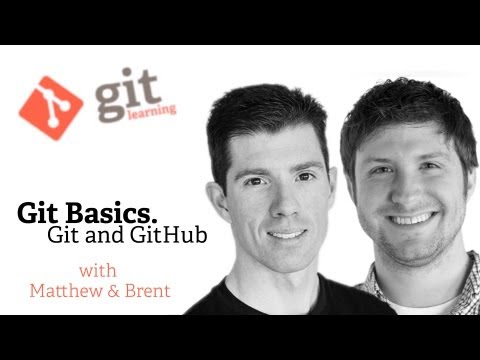

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('U8GBXvdmHT4')

### A few useful tips for common tasks

#### Better shell support

Adding git branch info to your bash prompt and tab completion for git commands and branches is extremely useful.  I suggest you at least copy:

- [git-completion.bash](https://github.com/git/git/blob/master/contrib/completion/git-completion.bash)
- [git-prompt.sh](https://github.com/git/git/blob/master/contrib/completion/git-prompt.sh)
 
You can then source both of these files in your `~/.bashrc` and then set your prompt (I'll assume you named them as the originals but starting with a `.` at the front of the name):

    source $HOME/.git-completion.bash
    source $HOME/.git-prompt.sh
    PS1='[\u@\h \W$(__git_ps1 " (%s)")]\$ '   # adjust this to your prompt liking

See the comments in both of those files for lots of extra functionality they offer.

#### Embedding Git information in LaTeX documents

(Sent by [Yaroslav Halchenko](http://www.onerussian.com))
su
I use a Make rule:

    # Helper if interested in providing proper version tag within the manuscript
    revision.tex: ../misc/revision.tex.in ../.git/index
       GITID=$$(git log -1 | grep -e '^commit' -e '^Date:' | sed  -e 's/^[^ ]* *//g' | tr '\n' ' '); \
       echo $$GITID; \
       sed -e "s/GITID/$$GITID/g" $< >| $@

in the top level `Makefile.common` which is included in all
subdirectories which actually contain papers (hence all those
`../.git`). The `revision.tex.in` file is simply:

    % Embed GIT ID revision and date
    \def\revision{GITID}

The corresponding `paper.pdf` depends on `revision.tex` and includes the
line `\input{revision}` to load up the actual revision mark.

#### git export

Git doesn't have a native export command, but this works just fine:

    git archive --prefix=fperez.org/  master | gzip > ~/tmp/source.tgz